## 파일 읽기
- 파일을 만들고 읽고 쓰는 방법

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC1-2/blob/main/gg-07-파일다루기.ipynb"><img src="https://github.com/swkim01/DSAC1-2/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC1-2/blob/main/gg-07-파일다루기.ipynb"><img src="https://github.com/swkim01/DSAC1-2/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

In [ ]:
from pandas import DataFrame, Series 
import pandas as pd 

- test.csv 파일을 새로 생성, write하는 방법
- cat 명령 : 파일의 내용을 읽어 화면에 출력 (type, for windows)

In [ ]:
f = open("test.csv", "w")
f.write("1,2,3,4,5 \n")
f.close()

In [ ]:
# !cat test.csv
!type test.csv

1,2,3,4,5 


In [ ]:
with open("test.csv", "a") as f:
    f.write("1,2,3,4,5 \n")
    f.write("1,2,3,4,5 \n")

In [ ]:
# !cat test.csv
!type test.csv

1,2,3,4,5 
1,2,3,4,5 
1,2,3,4,5 


- print(line, end = '') : end = '' 줄 바꾸지 말라는 의미
   * default : print() 수행 후 줄 바뀜 일어남

In [ ]:
with open("test.csv",'r') as f:
    for line in f:
        print(line, end = '')

1,2,3,4,5 
1,2,3,4,5 
1,2,3,4,5 


## 파일 open 옵션
- 'r': Open a file for reading. (default)  
- 'w' : Open a file for writing. Creates a new file if it does not exist or truncates the file if it exists.  
- 'x' : Open a file for exclusive creation. If the file already exists, the operation fails.  
- 'a' : Open for appending at the end of the file without truncating it. Creates a new file if it does not exist.
- 't' : Open in text mode. (default)  
- 'b' : Open in binary mode.  
- '+' : Open a file for updating (reading and writing) 
   * file pointer : 맨 앞에 위치(덮어쓰기, overwriting)

In [ ]:
with open("test.csv", "w") as f:
    f.write("a,b,c,d,message \n")
    f.write("1,2,3,4,hello \n")
    f.write("5,6,7,8,world \n")
    f.write("9,10,11,12,foo \n")

In [ ]:
!type test.csv

a,b,c,d,message 
1,2,3,4,hello 
5,6,7,8,world 
9,10,11,12,foo 


### csv 파일 --> DataFrame 으로 읽기
- pd.read_csv()
- default : 첫번째 줄을 header, 즉 column 으로 인식
   * header = None : header가 없다는 옵션, 첫번째 줄도 데이터로 인식
   * header = 1 : Column 이름으로 사용될 줄의 번호, 2번째 줄을 header로 인식, 삭제하고 데이터를 읽어들인다.

In [ ]:
pd.read_csv('test.csv')  # 자동으로 컬럼명을 만든다

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [ ]:
pd.read_csv('test.csv', header=None)

,0,1,2,3,4
0,a,b,c,d,message
1,1,2,3,4,hello
2,5,6,7,8,world
3,9,10,11,12,foo


In [ ]:
pd.read_csv('test.csv', header=1) 

,1,2,3,4,hello
0,5,6,7,8,world
1,9,10,11,12,foo


- column 명을 지정

In [ ]:
pd.read_csv('test.csv', names=['A','B','C','D','E'])

,A,B,C,D,E
0,a,b,c,d,message
1,1,2,3,4,hello
2,5,6,7,8,world
3,9,10,11,12,foo


In [ ]:
!type test.csv

a,b,c,d,message 
1,2,3,4,hello 
5,6,7,8,world 
9,10,11,12,foo 


- 읽어야 할 파일의 크기가 클 때, 일부의 행만 읽을 수 있다.
   * nrow = 2 : 상위 2개의 행 데이터만 read

In [ ]:
pd.read_csv('test.csv', nrows=2)

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world


In [ ]:
df = pd.read_csv('test.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


### CSV 파일로 출력
- to_csv()

In [ ]:
df.to_csv('output.csv')

In [ ]:
!type output.csv

,a,b,c,d,message 
0,1,2,3,4,hello 
1,5,6,7,8,world 
2,9,10,11,12,foo 


## 디렉토리 관리

- getcwd() : 현재 디렉토리 위치
- chdir() : 디렉토리 이동
- listdir : 현재 디렉토리 하의 모든 디렉토리, 파일들을 출력
- mkdir() : 디렉토리 생성
- rmdir() : 디렉토리 제거
- rename : 디렉토리/파일 이름을 수정
- remove() : 파일 삭제

In [ ]:
import os
os.getcwd()

'C:\\Users\\admin\\MyLab'

In [ ]:
# os.chdir('/Users/hwa-jongkim/Dropbox/data-science/data-science-all')
os.chdir('/Users/admin/MyLab/data')
os.getcwd()

'C:\\Users\\admin\\MyLab\\data'

In [ ]:
os.listdir()

['breast_cancer.csv',
 'coffee.csv',
 'house_data',
 'new_one',
 'no_show.csv',
 'python-logo.png',
 'radishsurvey.txt',
 'radishsurvey1.txt',
 'routes.dat',
 'routes.txt',
 'sms_spam(ok).csv',
 'sms_spam.csv',
 'test.png',
 '기타',
 '시도별_용도별.xls']

In [ ]:
os.mkdir('test')

In [ ]:
os.listdir()

['back',
 'breast_cancer.csv',
 'coffee.csv',
 'house_data',
 'new_one',
 'no_show.csv',
 'python-logo.png',
 'radishsurvey.txt',
 'radishsurvey1.txt',
 'routes.dat',
 'routes.txt',
 'sms_spam(ok).csv',
 'sms_spam.csv',
 'test.png',
 '기타',
 '시도별_용도별.xls']

In [ ]:
# os.rename('test','new_one')
# os.remove('output.csv')
os.rmdir('new_one')

In [ ]:
os.listdir()

['back',
 'breast_cancer.csv',
 'coffee.csv',
 'house_data',
 'no_show.csv',
 'python-logo.png',
 'radishsurvey.txt',
 'radishsurvey1.txt',
 'routes.dat',
 'routes.txt',
 'sms_spam(ok).csv',
 'sms_spam.csv',
 'test.png',
 '기타',
 '시도별_용도별.xls']

## json 형식 파일 read/write

- json 형식 : Web programming에서 자주 사용
   * Java Script Object Notation
   * json 객체 : (객체:속성) 형태의 내용들을 """   """ 로 묶어서 표현
   * json.loads() : json 형식의 string 객체를 파이썬 딕셔러니 형식으로 변경
   * json.dumps() : 파이썬 딕셔러니 형식 객체를 json 형식의 string으로 변경 

In [ ]:
import json

In [ ]:
# json은 python에서처럼 '으로 하면 안된다. 현재 """로 감싸 문자열로 저장되어 있기 때문에 
# javascript에서는 '를 string 값으로 인식하지 않아서 에러 발생
obj = """
{
    "name": "Kim",
    "places_lived": ["Seoul", "Korea"],
    "pet": null, "siblings": [{"name": "Scott", "age":25, "pet":"Zuko"}]
}
"""

In [ ]:
result = json.loads(obj)
result

{'name': 'Kim',
 'places_lived': ['Seoul', 'Korea'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 25, 'pet': 'Zuko'}]}

In [ ]:
asjson = json.dumps(result)
asjson

'{"name": "Kim", "places_lived": ["Seoul", "Korea"], "pet": null, "siblings": [{"name": "Scott", "age": 25, "pet": "Zuko"}]}'

## csv 파일 

- pd.read_csv('data/coffee.csv', nrows=10) : read 메소드로 파일 읽기
- csv.reader(f) : 파일 open후, 파일 pointer로 read
- csv.writer(f) : 파일 open후, 파일 pointer로 write

### 커피 파일
http://opentechschool.github.io/python-data-intro/files/coffee.csv

In [ ]:
!curl http://opentechschool.github.io/python-data-intro/files/coffee.csv \
    -o ./data/coffee.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: Failed to create the file ./data/coffee.csv: No such file or 

100   184  100   184    0     0    587      0 --:--:-- --:--:-- --:--:--   619
curl: (23) Failed writing body (0 != 184)


In [ ]:
cd ..

C:\Users\admin\MyLab


In [ ]:
# !head -10 ./data/coffee.csv
pd.read_csv('data/coffee.csv', nrows=10)

,Coffee,Water,Milk,Icecream
0,Espresso,No,No,No
1,Long Black,Yes,No,No
2,Flat White,No,Yes,No
3,Cappuccino,No,Yes - Frothy,No
4,Affogato,No,No,Yes


In [ ]:
import csv
f=open("./data/coffee.csv")
for row in csv.reader(f):
    print(row)
f.close()

['Coffee', 'Water', 'Milk', 'Icecream']
['Espresso', 'No', 'No', 'No']
['Long Black', 'Yes', 'No', 'No']
['Flat White', 'No', 'Yes', 'No']
['Cappuccino', 'No', 'Yes - Frothy', 'No']
['Affogato', 'No', 'No', 'Yes']


### 항공운항 데이터
https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat

In [ ]:
!curl https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat \
    -o ./data/airports.dat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 1082k    0  7434    0     0   7554      0  0:02:26 --:--:--  0:02:26  7554
 32 1082k   32  351k    0     0   270k      0  0:00:03  0:00:01  0:00:02  270k
100 1082k  100 1082k    0     0   744k      0  0:00:01  0:00:01 --:--:--  744k


In [ ]:
# 공항 이름

import csv
f = open("./data/airports.txt")
for row in csv.reader(f):
    print(row[1])
f.close()

Goroka Airport
Madang Airport
Mount Hagen Kagamuga Airport
Nadzab Airport
Port Moresby Jacksons International Airport
Wewak International Airport
Narsarsuaq Airport
Godthaab / Nuuk Airport
Kangerlussuaq Airport
Thule Air Base
Akureyri Airport
Egilsstaðir Airport
Hornafjorður Airport
Husavik Airport
Isafjorður Airport
Keflavik International Airport
Patreksfjorður Airport
Reykjavik Airport
Siglufjorður Airport
Vestmannaeyjar Airport
Sault Ste Marie Airport
Winnipeg / St. Andrews Airport
Halifax / CFB Shearwater Heliport
St. Anthony Airport
Tofino / Long Beach Airport
Kugaaruk Airport
Baie Comeau Airport
CFB Bagotville
Baker Lake Airport
Campbell River Airport
Brandon Municipal Airport
Cambridge Bay Airport
Nanaimo Airport
Castlegar/West Kootenay Regional Airport
Miramichi Airport
Charlo Airport
Kugluktuk Airport
Coronation Airport
Chilliwack Airport
Clyde River Airport
Coral Harbour Airport
Dawson City Airport
Burwash Airport
Princeton Airport
Deer Lake Airport
Dease Lake Airport
Dauphin

Kasteli Airport
Tripolis Airport
Thessaloniki Macedonia International Airport
Tatoi Airport
Zakynthos International Airport "Dionysios Solomos"
Budapest Liszt Ferenc International Airport
Debrecen International Airport
Kecskemet Airport
Nyiregyhaza Airport
?cseny Airport
Szentkiralyszabadja Airport
Szolnok Air Base
Amendola Air Base
Crotone Airport
Bari Karol Wojtyła Airport
Foggia "Gino Lisa" Airport
Taranto-Grottaglie "Marcello Arlotta" Airport
Lecce Galatina Air Base
Pescara International Airport
Brindisi ? Salento Airport
Gioia Del Colle Air Base
Lamezia Terme Airport
Catania-Fontanarossa Airport
Lampedusa Airport
Pantelleria Airport
Falcone?Borsellino Airport
Palermo-Boccadifalco Airport
Reggio Calabria Airport
Vincenzo Florio Airport Trapani-Birgi
Sigonella Navy Air Base
Alghero-Fertilia Airport
Decimomannu Air Base
Cagliari Elmas Airport
Olbia Costa Smeralda Airport
Tortoli Airport
Torino-Aeritalia Airport
Milano-Bresso Airfield
Malpensa International Airport
Il Caravaggio Inter

Sheik Isa Air Base
Abha Regional Airport
Al Ahsa Airport
Al Baha Airport
Bisha Airport
Abqaiq Airport
King Fahd International Airport
King Abdulaziz Air Base
Jizan Regional Airport
Gassim Airport
Gurayat Domestic Airport
Ha'il Airport
Jubail Airport
King Faisal Naval Base
King Abdulaziz International Airport
King Khaled Military City Airport
Prince Mohammad Bin Abdulaziz Airport
Nejran Airport
Al Qaisumah/Hafr Al Batin Airport
Pump Station 3 Airport
Pump Station 6 Airport
Pump Station 10 Airport
Rabigh Airport
Rafha Domestic Airport
King Khaled International Airport
Ras Mishab Airport
Arar Domestic Airport
Ras Tanura Airport
Sharurah Airport
Sulayel Airport
Tabuk Airport
Ta’if Regional Airport
Thumamah Airport
Ras Tanajib Airport
Turaif Domestic Airport
Al Wajh Domestic Airport
Prince Abdulmohsin Bin Abdulaziz Airport
Abadan Airport
Dezful Airport
Aghajari Airport
Gachsaran Airport
Shahid Asyaee Airport
Omidiyeh Airport
Mahshahr Airport
Ahwaz Airport
Abumusa Island Airport
Bushehr Airp

Tambaram Air Force Station
Paro Airport
Male International Airport
Don Mueang International Airport
Kamphaeng Saen Airport
Khok Kathiam Airport
U-Tapao International Airport
Watthana Nakhon Airport
Lampang Airport
Phrae Airport
Hua Hin Airport
Takhli Airport
Sak Long Airport
Nakhon Sawan Airport
Phitsanulok Airport
Khunan Phumipol Airport
Khoun Khan Airport
Narathiwat Airport
Krabi Airport
Songkhla Airport
Pattani Airport
Samui Airport
Cha Eian Airport
Phuket International Airport
Ranong Airport
Hat Yai International Airport
Trang Airport
Udon Thani Airport
Sakon Nakhon Airport
Surin Airport
Loei Airport
Khorat Airport
Rob Muang Airport
Da Nang International Airport
Gia Lam Air Base
Kep Air Base
Noi Bai International Airport
Nha Trang Air Base
Phu Bai Airport
Phu Quoc International Airport
Tan Son Nhat International Airport
Ann Airport
Anisakan Airport
Bagan Airport
Coco Island Airport
Heho Airport
Hommalinn Airport
Kengtung Airport
Kyaukpyu Airport
Lashio Airport
Lanywa Airport
Mandal

Stephens County Airport
Draughon Miller Central Texas Regional Airport
Ozona Municipal Airport
Kaadedhdhoo Airport
Aklavik/Freddie Carmichael Airport
Deline Airport
Tulita Airport
Fort Good Hope Airport
Tanna Airport
Paulatuk (Nora Aliqatchialuk Ruben) Airport
El Trompillo Airport
Juancho E. Yrausquin Airport
Eagle County Regional Airport
Stokmarknes Skagen Airport
Cuyahoga County Airport
Mansfield Lahm Regional Airport
Columbus Metropolitan Airport
Lawton Fort Sill Regional Airport
Northern Colorado Regional Airport
Flagstaff Pulliam Airport
Lake Tahoe Airport
Joslin Field Magic Valley Regional Airport
Martha's Vineyard Airport
Concord Municipal Airport
Groton New London Airport
St Cloud Regional Airport
Qinhuangdao Beidaihe Airport
Golden Triangle Regional Airport
Nizhny Novgorod Strigino International Airport
Bowerman Airport
Erie International Tom Ridge Field
Barnstable Municipal Boardman Polando Field
Sedona Airport
Morgantown Municipal Walter L. Bill Hart Field
Yeager Airport
Wil

Ankang Wulipu Airport
Golmud Airport
Hanzhong Chenggu Airport
Qingyang Airport
Xining Caojiabu Airport
Yan'an Ershilipu Airport
Yulin Yuyang Airport
Arvaikheer Airport
Altai Airport
Bayankhongor Airport
Dalanzadgad Airport
Khovd Airport
Moron Airport
Diqing Airport
Mangshi Airport
Pu'er Simao Airport
Zhaotong Airport
Ganzhou Airport
Jingdezhen Airport
Jiujiang Lushan Airport
Quzhou Airport
Lianyungang Airport
Huangyan Luqiao Airport
Shubuling Airport
Quanzhou Jinjiang International Airport
Tunxi International Airport
Weifang Airport
Weihai Airport
Sunan Shuofang International Airport
Nanping Wuyishan Airport
Wenzhou Longwan International Airport
Yancheng Airport
Yiwu Airport
Zhoushan Airport
Qamdo Bangda Airport
Dachuan Airport
Guangyuan Airport
Luzhou Airport
Mianyang Airport
Nanchong Airport
Nyingchi Airport
Wanxian Airport
Aksu Airport
Qiemo Yudu Airport
Kuqa Airport
Korla Airport
Karamay Airport
Yining Airport
Heihe Airport
Jiamusi Airport
Jinzhou Airport
Qiqihar Sanjiazi Airport
Y

Madera Municipal Airport
Trail Airport
Victoria Airport
Old Arctic Bay Airport
Birchwood Airport
Grand-Santi Airport
Maripasoula Airport
Saint-Laurent-du-Maroni Airport
Kanas Airport
Capurgana Airport
Sohag International Airport
Presidente General Don Oscar D. Gestido International Airport
Patos de Minas Airport
Bauru - Arealva Airport
Ourilandia do Norte Airport
Redencao Airport
Sao Felix do Xingu Airport
Bonito Airport
Sao Felix do Araguaia Airport
Cacador Airport
Carauari Airport
Urucu Airport
Eirunepe Airport
Concordia Airport
Francisco Beltrao Airport
Confresa Airport
Apalachicola Regional Airport
Umuarama Airport
Diamantina Airport
Fonte Boa Airport
Senadora Eunice Micheles Airport
Humaita Airport
Tapuruquara Airport
Oriximina Airport
Hotel Transamerica Airport
Telfer Airport
Gazipa?a Airport
Douglas Municipal Airport
St Lucie County International Airport
Taunton Municipal King Field
Plymouth Municipal Airport
Quonset State Airport
Norwood Memorial Airport
Westfield-Barnes Region

Eastern Sierra Regional Airport
Baker City Municipal Airport
Miley Memorial Field
Ozark Regional Airport
W K Kellogg Airport
Burley Municipal Airport
Northeast Iowa Regional Airport
Chanute Martin Johnson Airport
Jacksonville Executive at Craig Airport
Crossville Memorial Whitson Field
Davison Army Air Field
Barstow Daggett Airport
Deming Municipal Airport
Desert Rock Airport
Needles Airport
Duke Field
Murray Field
San Marcos Regional Airport
Sawyer County Airport
Kimble County Airport
Monticello Municipal Ellis Field
Derby Field
Mobridge Municipal Airport
Mc Comb/Pike County Airport/John E Lewis Field
Southern Illinois Airport
Mc Entire Joint National Guard Base
Brunswick Executive Airport
Naval Station Mayport (Admiral David L. Mcdonald Field)
Orangeburg Municipal Airport
Columbus Municipal Airport
Ottumwa Regional Airport
Cairns AAF (Fort Rucker) Air Field
Ralph Wenz Field
Dutchess County Airport
New Richmond Regional Airport
Russell Municipal Airport
Redwood Falls Municipal Airport

In [ ]:
# import csv
f = open("./data/airports.txt")
for row in csv.reader(f):
    if row[3] == "Australia" or row[3] == "Russia":
        print(row[1])
f.close()

Yakutsk Airport
Mirny Airport
Ignatyevo Airport
Khabarovsk-Novy Airport
Provideniya Bay Airport
Sokol Airport
Pevek Airport
Yelizovo Airport
Yuzhno-Sakhalinsk Airport
Vladivostok International Airport
Chita-Kadala Airport
Bratsk Airport
Irkutsk Airport
Ulan-Ude Airport (Mukhino)
Pulkovo Airport
Murmansk Airport
Khrabrovo Airport
Abakan Airport
Barnaul Airport
Kemerovo Airport
Omsk Central Airport
Krasnodar Pashkovsky International Airport
Uytash Airport
Mineralnyye Vody Airport
Stavropol Shpakovskoye Airport
Platov International Airport
Sochi International Airport
Astrakhan Airport
Volgograd International Airport
Chelyabinsk Balandino Airport
Magnitogorsk International Airport
Nizhnevartovsk Airport
Bolshoye Savino Airport
Surgut Airport
Koltsovo Airport
Bryansk Airport
Sheremetyevo International Airport
Migalovo Air Base
Voronezh International Airport
Vnukovo International Airport
Syktyvkar Airport
Kazan International Airport
Orenburg Central Airport
Ufa International Airport
Kurumoch

## 경로 데이터
https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat

In [ ]:
!curl https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat \
    -o ./data/routes.dat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 2321k    0  7433    0     0   5946      0  0:06:39  0:00:01  0:06:38  5946
 12 2321k   12  287k    0     0   128k      0  0:00:18  0:00:02  0:00:16  128k
 81 2321k   81 1887k    0     0   591k      0  0:00:03  0:00:03 --:--:--  591k
100 2321k  100 2321k    0     0   666k      0  0:00:03  0:00:03 --:--:--  666k


In [ ]:
latitudes = {}
longitudes = {}
f = open("./data/airports.txt")
for row in csv.reader(f):
    airport_id = row[0]
    latitudes[airport_id] = float(row[6])
    longitudes[airport_id] = float(row[7])

In [ ]:
!pip install geopy

In [ ]:
from geopy.distance import great_circle, geodesic
# great_circle((37, 127), (38, 129))
# dist = geodesic((37, 127), (38, 129))
# dist.km

In [ ]:
distances = []
f = open("./data/routes.txt")
for row in csv.reader(f):
    source_airport = row[3]
    dest_airport = row[5]
    if source_airport in latitudes and dest_airport in latitudes:
        source_lat = latitudes[source_airport]
        source_long = longitudes[source_airport]
        dest_lat = latitudes[dest_airport]
        dest_long = longitudes[dest_airport]
        distances.append(great_circle((source_lat,source_long),(dest_lat,dest_long)).km)
f.close()

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of flights')

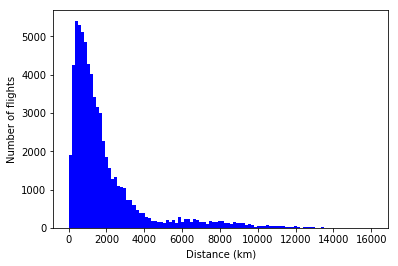

In [ ]:
plt.hist(distances, 100,facecolor='b')
plt.xlabel("Distance (km)")
plt.ylabel("Number of flights")